In [18]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

# Overview Plots

In [44]:
df_1m = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/high_granularity_bfield_map_r1m_p10cm_3711104pts_10-07_120052',input_type = 'pkl').data_frame

# Determining Optimal Number of Free Params

In [19]:
df_aic_cyl = pd.DataFrame(columns=['ms', 'ns', 'AIC'])
# lenscale = [0.25*x for x in range(4,20)]
ms = range(2,8)
ns = range(2,5)
# for scale in tqdm_notebook(lenscale, desc='scale'):
for m in tqdm_notebook(ms, desc='ms'):
    do_pickle=False
    for n in tqdm_notebook(ns, desc='ns'):
        cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=do_pickle, save_pickle=True,
                                     load_name='solB_scan', save_name='solB_scan', recreate=False)
        cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                         pitch2=0, ms_h2=0, ns_h2=0,
                                         length1=9.2, ms_c1=m, ns_c1=n,
                                         length2=0, ms_c2=0, ns_c2=0,
                                         ks_dict={'k3':10000},
                                         bs_tuples=((1, 0, -4.6),
                                                    (1, 0, 4.6)),
                                         bs_bounds=(1e-3, 1e-3, 4),
                                         version=1000)
        hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                          cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                          cfg_pickle_Cyl_Opt, cfg_plot_none)
        df_aic_cyl = df_aic_cyl.append({'ms':m, 'ns':n, 'AIC':np.log(-ff.result.aic)}, ignore_index=True)
        do_pickle=True

HBox(children=(IntProgress(value=0, description='ms', max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=2, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`ftol` termination condition is satisfied.
Function evaluations 78, initial cost 2.9168e+06, final cost 2.9850e+02, first-order optimality 8.47e-03.
Elapsed time was 26.2895 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 79
    # data points      = 17280
    # variables        = 23
    chi-square         = 596.99309
    reduced chi-square = 0.03459
    Akaike info crit   = -58108.10331
    Bayesian info crit = -57929.68530
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     2 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=3, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 33, initial cost 2.9160e+06, final cost 3.1070e+00, first-order optimality 5.11e-04.
Elapsed time was 15.7901 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 34
    # data points      = 17280
    # variables        = 27
    chi-square         = 6.21406
    reduced chi-square = 0.00036
    Akaike info crit   = -136984.86512
    Bayesian info crit = -136775.41788
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     3 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=4, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 27, initial cost 2.9174e+06, final cost 4.6293e+00, first-order optimality 3.93e-02.
Elapsed time was 15.3763 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 28
    # data points      = 17280
    # variables        = 31
    chi-square         = 9.25862
    reduced chi-square = 0.00054
    Akaike info crit   = -130086.63966
    Bayesian info crit = -129846.16320
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     4 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 29, initial cost 2.9179e+06, final cost 6.4530e-02, first-order optimality 2.14e-04.
Elapsed time was 16.1288 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 30
    # data points      = 17280
    # variables        = 35
    chi-square         = 0.12906
    reduced chi-square = 0.00001
    Akaike info crit   = -203916.67745
    Bayesian info crit = -203645.17177
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=6, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 36, initial cost 2.9195e+06, final cost 6.5318e-02, first-order optimality 6.25e-05.
Elapsed time was 20.5925 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 37
    # data points      = 17280
    # variables        = 39
    chi-square         = 0.13064
    reduced chi-square = 0.00001
    Akaike info crit   = -203698.85698
    Bayesian info crit = -203396.32209
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     6 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

HBox(children=(IntProgress(value=0, description='ns', max=3), HTML(value='')))

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=7, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 33, initial cost 2.9243e+06, final cost 6.4280e-02, first-order optimality 8.37e-05.
Elapsed time was 19.3059 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 34
    # data points      = 17280
    # variables        = 43
    chi-square         = 0.12856
    reduced chi-square = 0.00001
    Akaike info crit   = -203967.80743
    Bayesian info crit = -203634.24331
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     7 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixed)

In [23]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=3, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[5,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=3, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 36, initial cost 2.9160e+06, final cost 3.0564e+00, first-order optimality 6.69e-04.
Elapsed time was 21.599 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 37
    # data points      = 17280
    # variables        = 41
    chi-square         = 6.11274
    reduced chi-square = 0.00035
    Akaike info crit   = -137240.94712
    Bayesian info crit = -136922.89761
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     3 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)


In [25]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=4, ns_c1=2,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[6,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=4, ns_c1=2, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 131, initial cost 2.9174e+06, final cost 9.3375e-02, first-order optimality 1.37e-04.
Elapsed time was 46.9174 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 132
    # data points      = 17280
    # variables        = 31
    chi-square         = 0.18675
    reduced chi-square = 0.00001
    Akaike info crit   = -197539.80322
    Bayesian info crit = -197299.32676
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     4 (fixed)
    ns_c1:     2 (fixed)
    length2:   0 (fixe

In [27]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=4, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(1e-3, 1e-3, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[8,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=4, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.001, 0.001, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 563, initial cost 2.9175e+06, final cost 4.1682e-02, first-order optimality 8.30e-05.
Elapsed time was 326.353 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 564
    # data points      = 17280
    # variables        = 49
    chi-square         = 0.08336
    reduced chi-square = 0.00000
    Akaike info crit   = -211441.00636
    Bayesian info crit = -211060.89841
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     4 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixe

In [29]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[11,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 43, initial cost 2.9183e+06, final cost 1.2282e-02, first-order optimality 7.38e-04.
Elapsed time was 30.1671 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 44
    # data points      = 17280
    # variables        = 57
    chi-square         = 0.02456
    reduced chi-square = 0.00000
    Akaike info crit   = -232540.52531
    Bayesian info crit = -232098.35893
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
   

In [33]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solB_scan', save_name='solB_scan', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=7, ns_c1=4,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)
df_aic_cyl.at[17,'AIC'] = np.log(-ff.result.aic)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=7, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 46, initial cost 2.9269e+06, final cost 1.2037e-02, first-order optimality 7.36e-05.
Elapsed time was 36.3557 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 47
    # data points      = 17280
    # variables        = 73
    chi-square         = 0.02407
    reduced chi-square = 0.00000
    Akaike info crit   = -232855.59188
    Bayesian info crit = -232289.30861
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     7 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
   

In [36]:
df_aic_cyl.to_pickle('pickles/df_aic_solB.pkl')

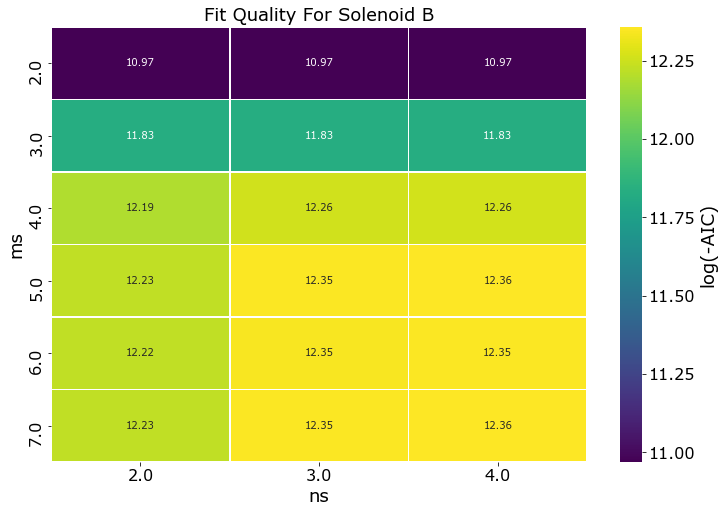

In [35]:
from matplotlib.ticker import FormatStrFormatter

ax = sns.heatmap(df_aic_cyl.pivot('ms', 'ns', 'AIC'), annot=True, fmt='.2f', linewidths=.5, cmap='viridis',
           cbar_kws={'label': 'log(-AIC)'}, xticklabels=1)
plt.title(f'Fit Quality For Solenoid B')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/aic_solB_v2.pdf')

# Fit Plots

In [74]:
cfg_pickle_Cyl_Opt = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_cyl_val', save_name='solC_cyl_val', recreate=False)
cfg_params_Cyl_Opt  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=9.2, ms_c1=5, ns_c1=3,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 ks_dict={'k3':10000},
                                 bs_tuples=((1, 0, -4.6),
                                            (1, 0, 4.6)),
                                 bs_bounds=(0.1, 0.1, 4),
                                 version=1000)
hmd, ff = field_map_analysis('fma_opt_test', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_Opt, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
`xtol` termination condition is satisfied.
Function evaluations 49, initial cost 2.9183e+06, final cost 1.3194e-02, first-order optimality 2.09e-04.
Elapsed time was 22.6293 seconds
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 50
    # data points      = 17280
    # variables        = 46
    chi-square         = 0.02639
    reduced chi-square = 0.00000
    Akaike info crit   = -231324.40448
    Bayesian info crit = -230967.56845
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     3 (fixed)
    length2:   0 (fixed)
   

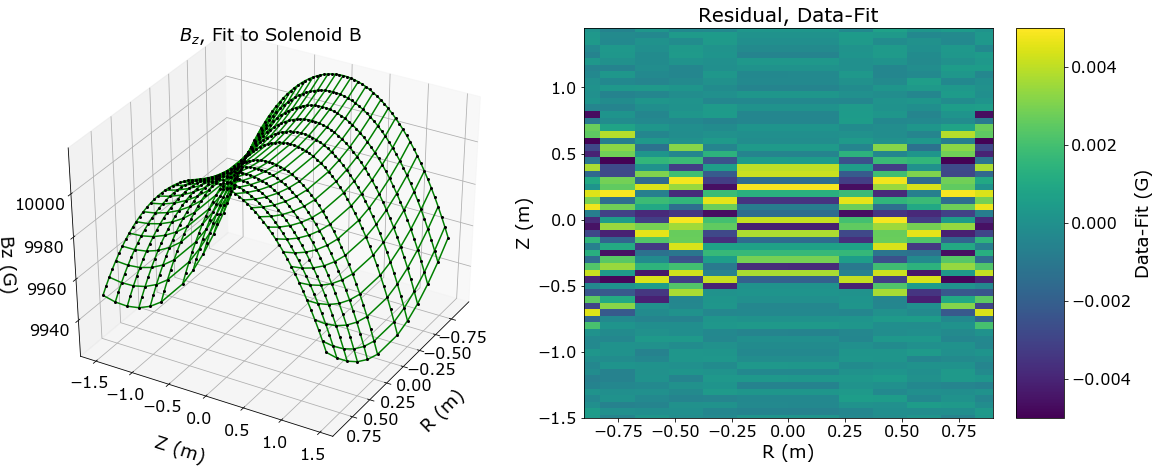

In [37]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{z}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bz_B_fit.png', bbox_inches='tight')

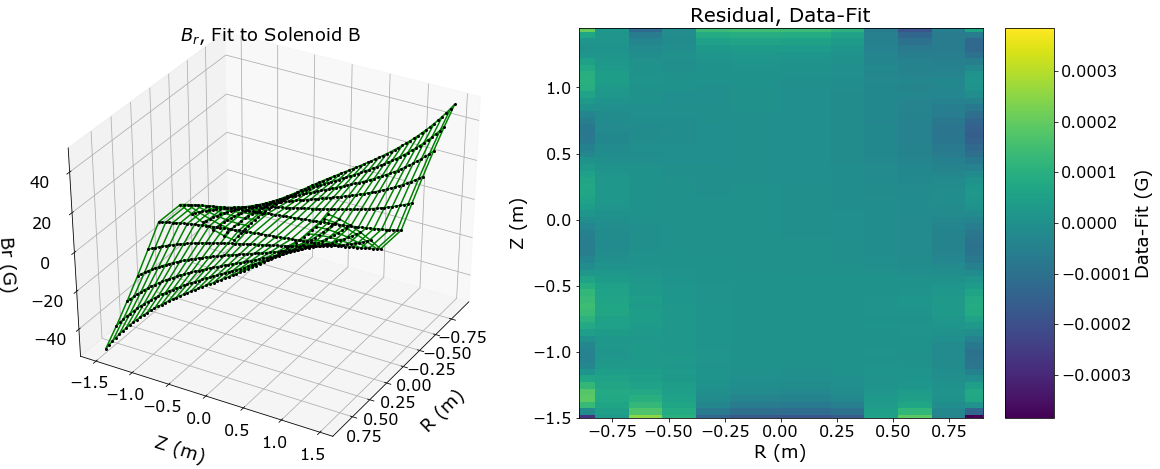

In [38]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{r}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/br_B_fit.png', bbox_inches='tight')

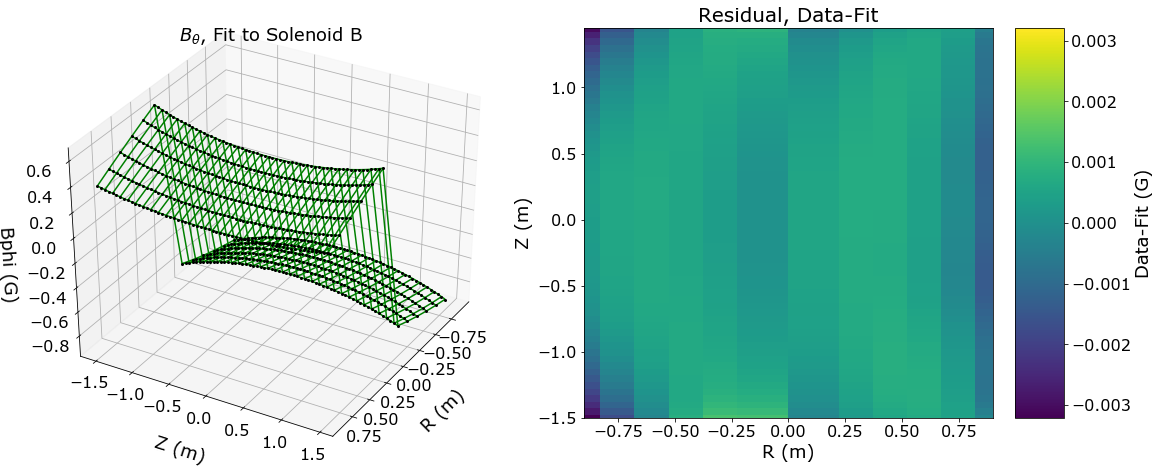

In [39]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<=0.9 and Phi=={phi} and -2<Z<2',
            title_simp = r'$B_{\theta}$, Fit to Solenoid B', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/bt_B_fit.png', bbox_inches='tight')

# Validation

In [75]:
cfg_pickle_Cyl_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solC_cyl_val', save_name='solC_cyl_val', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solC', cfg_data_Cole_1m_cyl,
                                  cfg_geom_Cole_1m_cyl_hg, cfg_params_Cyl_Opt,
                                  cfg_pickle_Cyl_fs, cfg_plot_none)
df_fs =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=9.2, ms_c1=5, ns_c1=3, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=((1, 0, -4.6), (1, 0, 4.6)), bs_bounds=(0.1, 0.1, 4), version=1000)
Elapsed time was 10.1357 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 1088640
    # variables        = 0
    chi-square         = 1.49045
    reduced chi-square = 0.00000
    Akaike info crit   = -14698119.68139
    Bayesian info crit = -14698119.68139
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   9.2 (fixed)
    ms_c1:     5 (fixed)
    ns_c1:     3 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:  -21.91004 (fixed)
    Bc1_0_0:   29090.11 (fixed)
    Dc1_0:    -1.595805 (fixed)
 

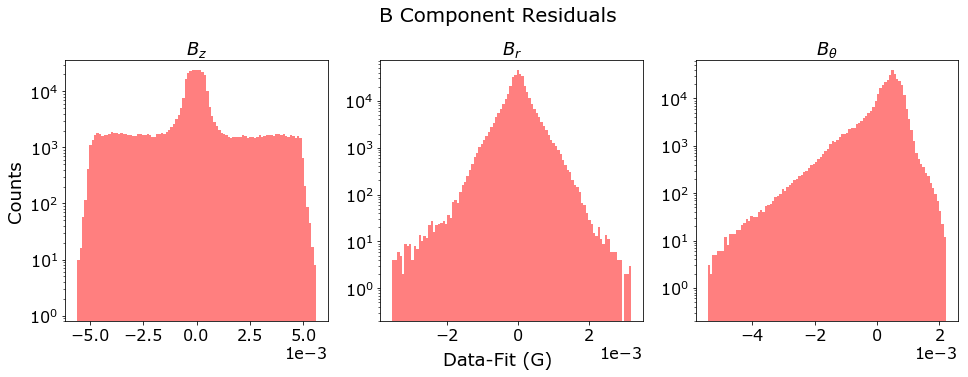

In [76]:
fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs.Bz-df_fs.Bz_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_{z}$')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs.Br-df_fs.Br_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_r$')
ax = fig.add_subplot(1, 3, 3)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs.Bphi-df_fs.Bphi_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title(r'$B_{\theta}$')
fig.suptitle('B Component Residuals', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solB.pdf', bbox_inches='tight')